In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df[['sex']])
df['smoker'] = le.fit_transform(df[['smoker']])
df['region'] = le.fit_transform(df[['region']])

/Users/sivaprasanth/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sivaprasanth/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sivaprasanth/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
X_train = torch.tensor(X_train.values).float()
X_test = torch.tensor(X_test.values).float()
y_train = torch.tensor(y_train.values).float()
y_test = torch.tensor(y_test.values).float()

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(6,1)
    def forward(self,x):
        return self.linear(x)

In [7]:
model = LinearRegressionModel()
Criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [8]:
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = Criterion(outputs,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

/Users/sivaprasanth/.pyenv/versions/3.10.12/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1070])) that is different to the input size (torch.Size([1070, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [9]:
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = Criterion(y_pred,y_test)
    model.train()

/Users/sivaprasanth/.pyenv/versions/3.10.12/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([268])) that is different to the input size (torch.Size([268, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


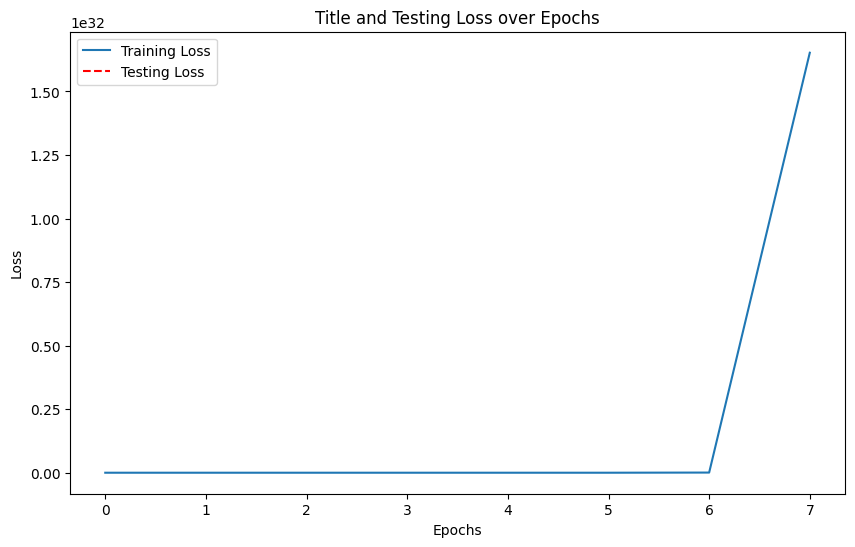

In [10]:
plt.figure(figsize=(10,6))
plt.plot(train_losses,label='Training Loss')
plt.axhline(y=test_loss.item(),color='r',linestyle='--',label='Testing Loss')
plt.title('Title and Testing Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()